### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [2]:
df= pd.read_csv("Global+Superstore+Data.csv")
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200



### Exploring the dataset 

In [3]:
df.shape

(51290, 5)

In [4]:
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
df.nunique()

Order Date     1430
Segment           3
Market            7
Sales         22995
Profit        24575
dtype: int64

<AxesSubplot:>

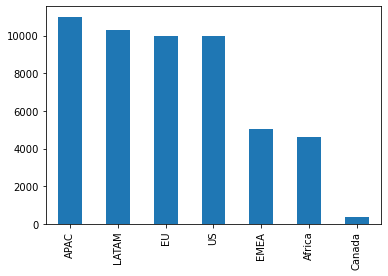

In [7]:
df["Market"].value_counts().plot.bar()

<AxesSubplot:>

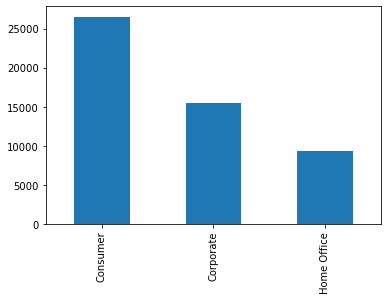

In [8]:
df["Segment"].value_counts().plot.bar()

In [9]:
df["Market_segment"]= df["Market"]+ " _" +df["Segment"]

In [10]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US _Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC _Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC _Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU _Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa _Consumer


In [11]:
df["Market_segment"].value_counts()

APAC _Consumer         5699
LATAM _Consumer        5321
US _Consumer           5191
EU _Consumer           5186
APAC _Corporate        3283
EU _Corporate          3077
LATAM _Corporate       3053
US _Corporate          3020
EMEA _Consumer         2538
Africa _Consumer       2381
APAC _Home Office      2020
LATAM _Home Office     1920
US _Home Office        1783
EU _Home Office        1737
EMEA _Corporate        1574
Africa _Corporate      1312
EMEA _Home Office       917
Africa _Home Office     894
Canada _Consumer        202
Canada _Corporate       110
Canada _Home Office      72
Name: Market_segment, dtype: int64

<AxesSubplot:>

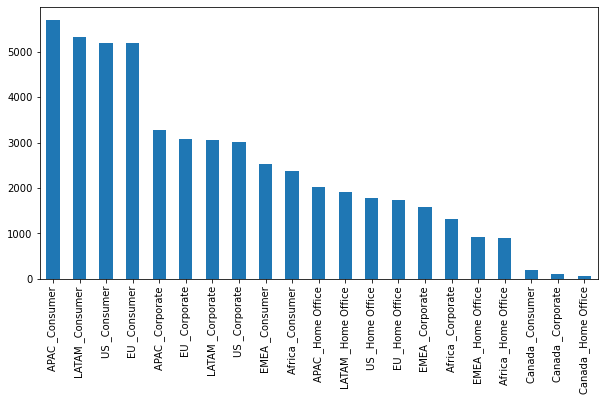

In [12]:
plt.rcParams["figure.figsize"]= (10,5)
df["Market_segment"].value_counts().plot.bar()

In [13]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US _Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC _Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC _Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU _Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa _Consumer


<AxesSubplot:xlabel='Market', ylabel='Profit'>

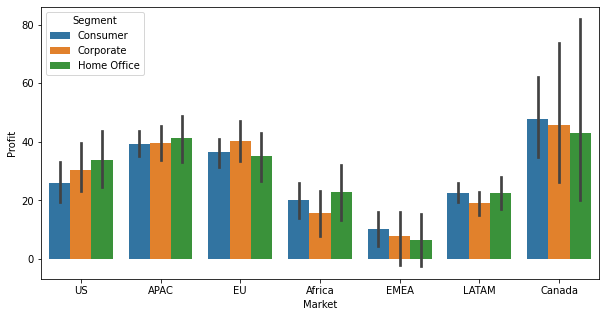

In [14]:
sns.barplot(x= "Market", y= "Profit", hue= "Segment", data= df)

<AxesSubplot:xlabel='Market', ylabel='Sales'>

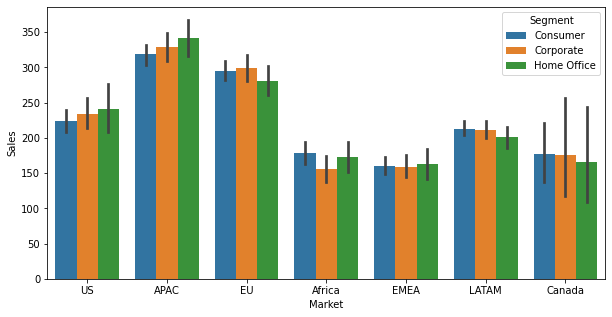

In [15]:
sns.barplot(x= "Market", y= "Sales", hue="Segment", data= df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   Market          51290 non-null  object 
 3   Sales           51290 non-null  float64
 4   Profit          51290 non-null  float64
 5   Market_segment  51290 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


In [17]:
df["Order Date"]= pd.to_datetime(df["Order Date"]).dt.to_period("m")
df= df.sort_values(by= ["Order Date"])

In [18]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
15262,2011-01,Corporate,EU,139.65,15.30,EU _Corporate
26744,2011-01,Consumer,EU,88.44,15.84,EU _Consumer
48614,2011-01,Corporate,EU,11.43,4.11,EU _Corporate
9417,2011-01,Consumer,LATAM,491.00,122.70,LATAM _Consumer
48590,2011-01,Home Office,US,4.71,0.00,US _Home Office


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Segment         51290 non-null  object   
 2   Market          51290 non-null  object   
 3   Sales           51290 non-null  float64  
 4   Profit          51290 non-null  float64  
 5   Market_segment  51290 non-null  object   
dtypes: float64(2), object(3), period[M](1)
memory usage: 2.7+ MB


In [20]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
15262,2011-01,Corporate,EU,139.65,15.30,EU _Corporate
26744,2011-01,Consumer,EU,88.44,15.84,EU _Consumer
48614,2011-01,Corporate,EU,11.43,4.11,EU _Corporate
9417,2011-01,Consumer,LATAM,491.00,122.70,LATAM _Consumer
48590,2011-01,Home Office,US,4.71,0.00,US _Home Office


### train_test_split 

In [21]:
df.shape

(51290, 6)

In [22]:
df_new = df.pivot_table(index= "Order Date", values= "Profit", columns= "Market_segment", aggfunc= "sum")
df_new.head()

Market_segment,APAC _Consumer,APAC _Corporate,APAC _Home Office,Africa _Consumer,Africa _Corporate,Africa _Home Office,Canada _Consumer,Canada _Corporate,Canada _Home Office,EMEA _Consumer,...,EMEA _Home Office,EU _Consumer,EU _Corporate,EU _Home Office,LATAM _Consumer,LATAM _Corporate,LATAM _Home Office,US _Consumer,US _Corporate,US _Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [23]:
df_new.shape

(48, 21)

In [24]:
train= df_new[:42]
test= df_new[42:]

In [25]:
train.shape

(42, 21)

In [26]:
test.shape

(6, 21)

## Coeffficient of variation 

In [27]:
df_new["APAC _Consumer"].std()/df_new["APAC _Consumer"].mean()

0.5724484468518359

In [28]:
train.mean()

Market_segment
APAC _Consumer         4400.894243
APAC _Corporate        2574.919807
APAC _Home Office      1511.088314
Africa _Consumer        957.707000
Africa _Corporate       412.617571
Africa _Home Office     377.221071
Canada _Consumer        225.987632
Canada _Corporate        90.980294
Canada _Home Office     118.003750
EMEA _Consumer          423.960286
EMEA _Corporate         182.642643
EMEA _Home Office        84.231366
EU _Consumer           3699.977143
EU _Corporate          2216.299429
EU _Home Office        1224.456536
LATAM _Consumer        2295.555697
LATAM _Corporate       1122.633016
LATAM _Home Office      818.398941
US _Consumer           2686.740912
US _Corporate          1754.199083
US _Home Office        1132.065762
dtype: float64

In [29]:
CoV_df=pd.DataFrame(train.mean())

In [30]:
CoV_df["std"]= train.std()

In [31]:
CoV_df.rename(columns= {0: "Mean"}, inplace= True)

In [32]:
CoV_df

,Mean,std
Market_segment,,
APAC _Consumer,4400.894243,2328.343041
APAC _Corporate,2574.919807,1381.381825
APAC _Home Office,1511.088314,1541.976104
Africa _Consumer,957.707000,1270.143926
Africa _Corporate,412.617571,790.028612
Africa _Home Office,377.221071,768.526445
Canada _Consumer,225.987632,286.348653
Canada _Corporate,90.980294,164.936757
Canada _Home Office,118.003750,285.647164


In [33]:
CoV_df["COV"]= CoV_df["std"]/ CoV_df["Mean"]

In [34]:
CoV_df.sort_values(by= "COV", ascending= "True", inplace= True)

In [35]:
CoV_df

,Mean,std,COV
Market_segment,,,
APAC _Consumer,4400.894243,2328.343041,0.529061
APAC _Corporate,2574.919807,1381.381825,0.536476
EU _Consumer,3699.977143,2228.977594,0.602430
LATAM _Consumer,2295.555697,1588.659231,0.692059
EU _Corporate,2216.299429,1619.735425,0.730829
LATAM _Corporate,1122.633016,1002.365692,0.892870
EU _Home Office,1224.456536,1162.551208,0.949443
APAC _Home Office,1511.088314,1541.976104,1.020441
US _Consumer,2686.740912,2747.942085,1.022779


In [36]:
df.dtypes

Order Date        period[M]
Segment              object
Market               object
Sales               float64
Profit              float64
Market_segment       object
dtype: object

In [37]:
df["Order Date"]= df["Order Date"].astype(str)
df["Order Date"]= pd.to_datetime(df["Order Date"])
df.dtypes

Order Date        datetime64[ns]
Segment                   object
Market                    object
Sales                    float64
Profit                   float64
Market_segment            object
dtype: object

In [38]:
df_new= df[df["Market_segment"]== "APAC _Consumer"]

In [39]:
df_new

,Order Date,Segment,Market,Sales,Profit,Market_segment
1080,2011-01-01,Consumer,APAC,1429.0500,371.4900,APAC _Consumer
9203,2011-01-01,Consumer,APAC,219.7800,59.3400,APAC _Consumer
19331,2011-01-01,Consumer,APAC,342.5100,54.6000,APAC _Consumer
26270,2011-01-01,Consumer,APAC,102.7620,1.8420,APAC _Consumer
14830,2011-01-01,Consumer,APAC,420.4200,147.0000,APAC _Consumer
...,...,...,...,...,...,...
11002,2014-12-01,Consumer,APAC,243.6840,-89.3760,APAC _Consumer
42899,2014-12-01,Consumer,APAC,39.0000,7.3800,APAC _Consumer
30816,2014-12-01,Consumer,APAC,100.4964,-12.1836,APAC _Consumer
7829,2014-12-01,Consumer,APAC,608.5800,0.0000,APAC _Consumer


In [40]:
data= pd.DataFrame(df_new.groupby("Order Date")["Sales"].sum())
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [41]:
data.shape

(48, 1)

<AxesSubplot:xlabel='Order Date'>

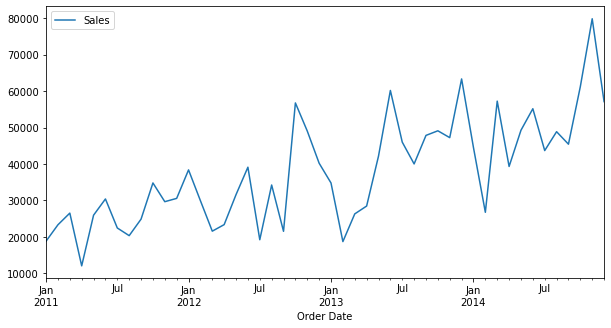

In [42]:
data.plot()

In [43]:
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [45]:
data.describe()

,Sales
count,48.000000
mean,37849.035425
std,14671.281955
min,12046.092300
25%,26209.485300
50%,36578.300400
75%,48088.354575
max,79834.429500


In [46]:
train= data[:42]
test= data[42:]

In [47]:
print(train.shape
,test.shape)

(42, 1) (6, 1)


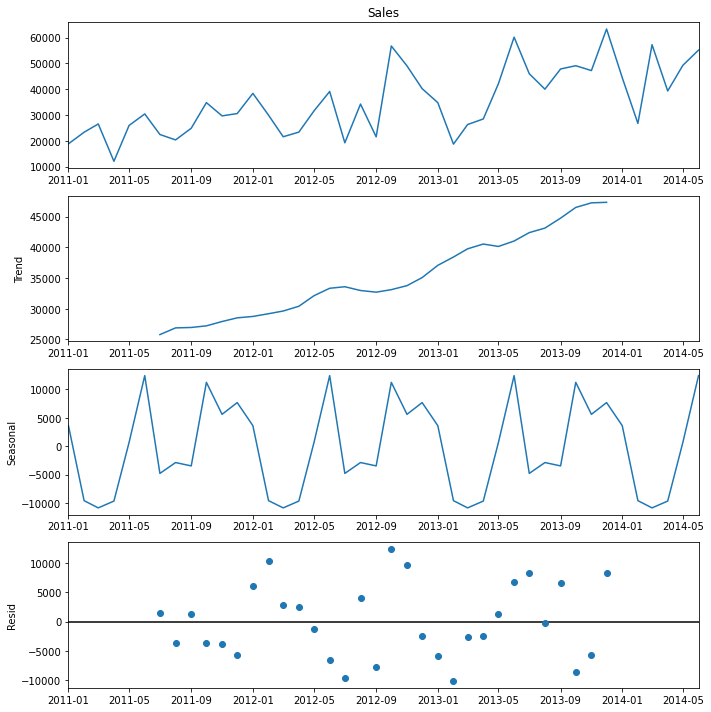

In [48]:
plt.rcParams["figure.figsize"]= [10,10]
decomposition= sm.tsa.seasonal_decompose(train["Sales"], model= "additive")
decomposition.plot();

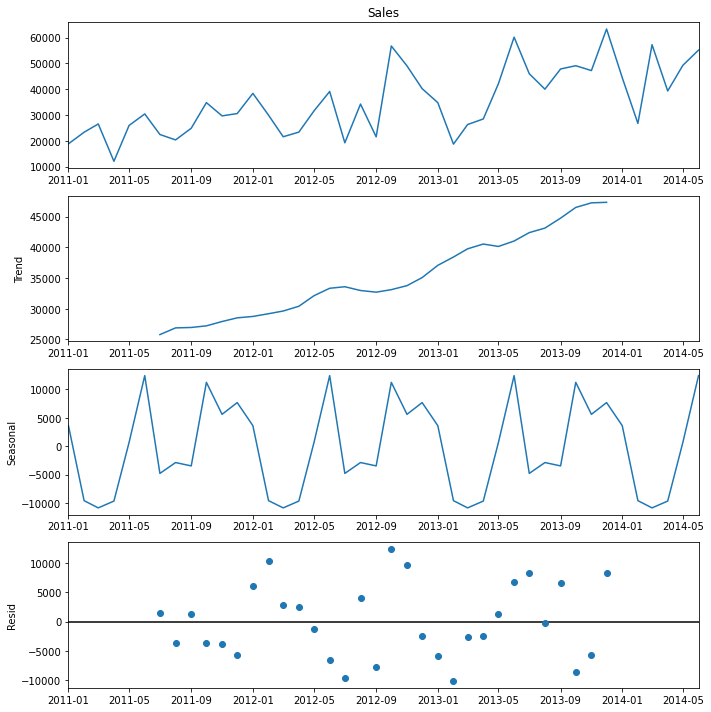

In [49]:
decompostion= sm.tsa.seasonal_decompose(data, model= "multiplicative")
decomposition.plot();

### Naive method

In [50]:
y_hat_naive= test.copy()
y_hat_naive["naive forecast"]= train["Sales"][42-1]

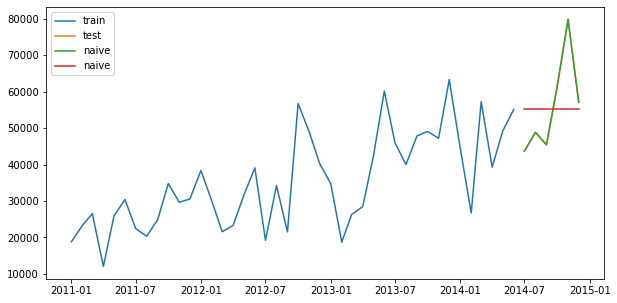

In [51]:
plt.rcParams["figure.figsize"]= [10,5]
plt.plot(train, label= "train")
plt.plot(test, label= "test")
plt.plot(y_hat_naive, label= "naive")
plt.legend()

In [52]:
### Calculating RMSE and MAPE
from sklearn.metrics import mean_squared_error 
rmse_naive= np.sqrt(mean_squared_error(test["Sales"], y_hat_naive["naive forecast"]))
mape_naive= np.round(np.mean(np.abs(test["Sales"]- y_hat_naive["naive forecast"])/ test["Sales"])*100) 
print(rmse_naive, mape_naive)

12355.96913440896 17.0


In [53]:
results= pd.DataFrame({"Method": ["Naive"], "MAPE": [mape_naive], "RMSE": [rmse_naive]})
#results= results[["Method", "RMSE", "MAPE"]]

In [54]:
results

,Method,MAPE,RMSE
0,Naive,17.0,12355.969134


In [55]:
train.mean()

Sales    35253.632814
dtype: float64

### Simple Average Method 

In [56]:
y_hat_SAM= test.copy()
y_hat_SAM["avg_forecast"]= train["Sales"].mean()

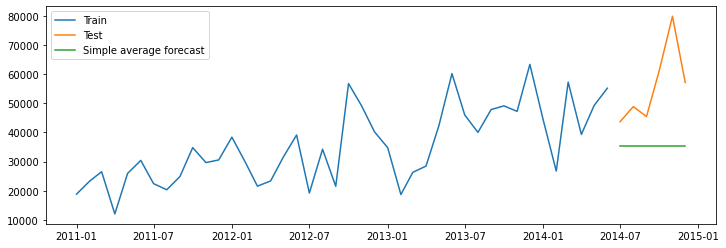

In [57]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_SAM['avg_forecast'], label='Simple average forecast')
plt.legend()
plt.show()

In [58]:
rmse_sam= np.sqrt(mean_squared_error(test["Sales"], y_hat_SAM["avg_forecast"])).round(2)

In [59]:
rmse_sam

24146.06

In [60]:
mape_sam= np.round(np.mean(np.abs(test["Sales"]- y_hat_SAM["avg_forecast"])/test["Sales"])*100,2)

In [61]:
mape_sam

34.34

In [62]:
tempResults= ["Simple Average Method", mape_sam, rmse_sam]

In [63]:
results.loc[1]= tempResults

In [64]:
results

,Method,MAPE,RMSE
0,Naive,17.00,12355.969134
1,Simple Average Method,34.34,24146.060000


### Simple Moving Average 

In [65]:
y_hat_sma= data.copy()
ma_window=4
y_hat_sma["sma_forecast"]= data["Sales"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][42:]= y_hat_sma["sma_forecast"][42-1]


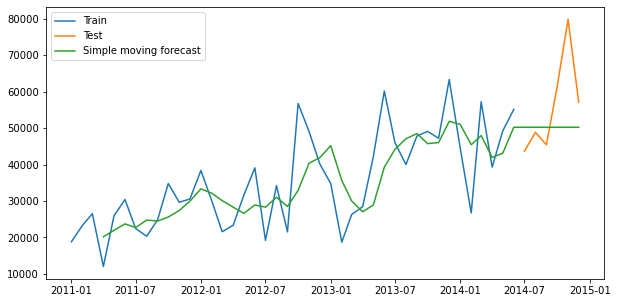

In [66]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving forecast')
plt.legend()

In [67]:
rmse_sma= np.sqrt(mean_squared_error(test["Sales"], y_hat_sma["sma_forecast"][42:]))

In [68]:
rmse_sma

13614.024310172708

In [69]:
mape_sma=(np.mean(np.abs(test['Sales']- y_hat_sma["sma_forecast"])/(test["Sales"])*100))

In [70]:
mape_sma

15.917237006517338

In [71]:
tempResults= ["Simple moving average" , mape_sma, rmse_sma]
results.loc[2]= tempResults

In [72]:
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310


## Exponential Smoothing Techniques

### Simple Exponential Smoothing 

In [73]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model= SimpleExpSmoothing(train["Sales"])
ses_model= model.fit(optimized= True)
print(ses_model.params)

{'smoothing_level': 0.24674418604651163, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [74]:
y_hat_ses= test.copy()
y_hat_ses["ses_forecast"]= ses_model.forecast(6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


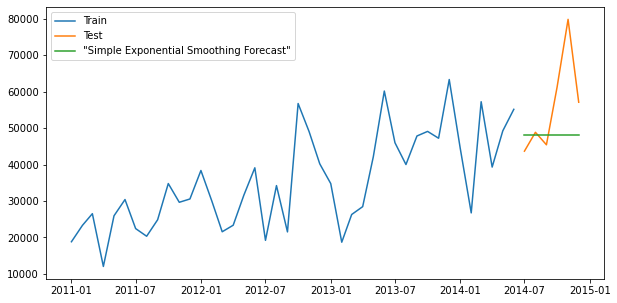

In [75]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='"Simple Exponential Smoothing Forecast"')
plt.legend()

In [76]:
rmse_ses= np.sqrt(mean_squared_error(test["Sales"], y_hat_ses["ses_forecast"]))
rmse_ses

14627.341914279617

In [77]:
mape_ses= np.mean(np.abs(test["Sales"]- y_hat_ses["ses_forecast"])/test["Sales"])*100

In [78]:
mape_ses

15.736384923336564

In [79]:
tempResults= ["Simple Exponential Smoothing Forecast", mape_ses, rmse_ses]
results.loc[3]= tempResults
results.head()

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914


### Holt's Exponential Smoothing

##### Additive

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hes_model= ExponentialSmoothing(np.asarray(train["Sales"]), seasonal_periods= 12, trend= "additive", seasonal =None)
hes_add_fit= hes_model.fit(optimized= True)
hes_add_fit.params
                        

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.2642857142857143,
 'smoothing_trend': 0.19220779220779222,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 18821.9898,
 'initial_trend': 4491.363300000001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
y_hat_holt= test.copy()
y_hat_holt["holts_forecast"] = hes_add_fit.forecast(6)

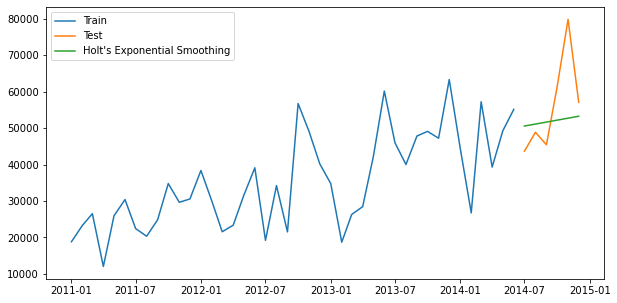

In [82]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holts_forecast'], label="Holt's Exponential Smoothing")
plt.legend()

In [83]:
rmse_add_holt= np.sqrt(mean_squared_error(test["Sales"], y_hat_holt["holts_forecast"]))
rmse_add_holt

12403.842862644507

In [84]:
mape_add_holt= np.mean(np.abs(test["Sales"]- y_hat_holt["holts_forecast"])/test["Sales"])*100

In [85]:
mape_add_holt

14.930501215425245

In [86]:
tempResult=["Holt's Exponential smoothing Additive", mape_add_holt, rmse_add_holt]
results.loc[4]= tempResult
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863


##### Multiplicative 

In [87]:
hes_model= ExponentialSmoothing(train["Sales"],seasonal_periods= 12, trend= "multiplicative", seasonal= None)
hes_fit= hes_model.fit(optimized= True)
print(hes_fit.params)

{'smoothing_level': 0.35857142857142854, 'smoothing_trend': 0.20079999999999995, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 1.2386231927508535, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [88]:
y_hat_hes= test.copy()
y_hat_hes["holts_multiplicative_forecast"]= hes_fit.forecast(6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


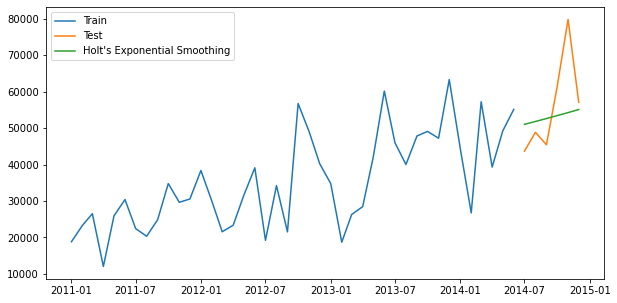

In [89]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hes['holts_multiplicative_forecast'], label="Holt's Exponential Smoothing")
plt.legend()

In [90]:
rmse_multi_holt= np.sqrt(mean_squared_error(test["Sales"], y_hat_hes["holts_multiplicative_forecast"]))
rmse_multi_holt

11789.645620748624

In [91]:
mape_mult_holt= np.mean(np.abs(test["Sales"]- y_hat_hes["holts_multiplicative_forecast"])/test["Sales"])*100
mape_mult_holt

14.511280408073537

In [92]:
tempResults= ["Holt's Multiplicative Exponential", mape_mult_holt, rmse_multi_holt]
results.loc[5]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621


### Holt Winter's Exponential Smoothing

##### Holt Winter's additive method

In [93]:
hwa_model= ExponentialSmoothing(np.asarray(train["Sales"]), seasonal= "add", trend= "add" , seasonal_periods= 12)
hwa_fit= hwa_model.fit(optimized= True)
print(hwa_fit.params)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
y_hat_hwa= test.copy()
y_hat_hwa["hwa_forecast"]= hwa_fit.forecast(6)

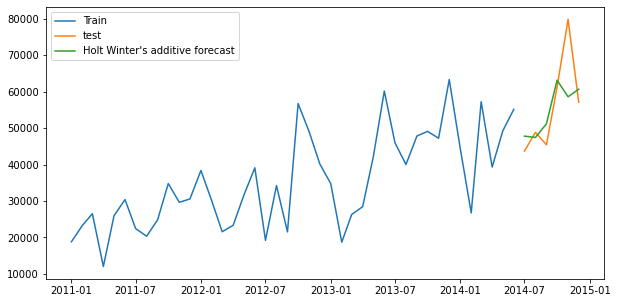

In [95]:
plt.plot(train["Sales"], label="Train")
plt.plot(test["Sales"], label= "test")
plt.plot(y_hat_hwa["hwa_forecast"], label= "Holt Winter's additive forecast")
plt.legend()

In [96]:
rmse_hwa= np.sqrt(mean_squared_error(test["Sales"], y_hat_hwa["hwa_forecast"]))
rmse_hwa

9306.821065225684

In [97]:
mape_hwa= np.mean(np.abs(test["Sales"]- y_hat_hwa['hwa_forecast'])/test["Sales"])*100

In [98]:
mape_hwa

10.1747655530505

In [99]:
tempResults= ["Holt Winter's additive forecast", mape_hwa, rmse_hwa]
results.loc[6]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065


##### Holt Winter's Multiplicative forecast

In [100]:
hwm_model= ExponentialSmoothing(train["Sales"], seasonal_periods= 12, trend= "add", seasonal= "mul")
model_hwm_fit= hwm_model.fit(optimized = True)
print(model_hwm_fit.params)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [101]:
y_hat_hwm= test["Sales"]
y_hat_hwm["hwm_forecast"]= model_hwm_fit.forecast(6)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\Abhishek\AppData\Local\Temp/ipykernel_11952/2590734846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_hwm["hwm_forecast"]= model_hwm_fit.forecast(6)


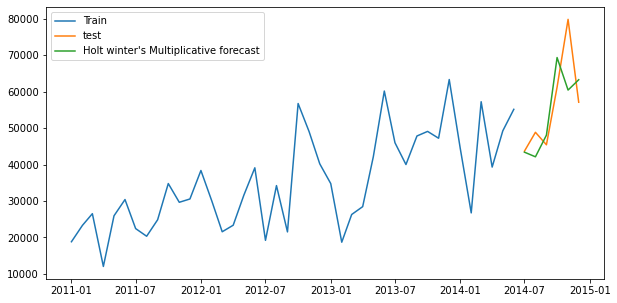

In [102]:
plt.plot(train["Sales"], label= "Train")
plt.plot(test["Sales"], label= "test")
plt.plot(y_hat_hwm["hwm_forecast"], label= "Holt winter's Multiplicative forecast")
plt.legend()

In [103]:
rmse_hwm= np.sqrt(mean_squared_error(test["Sales"], y_hat_hwm["hwm_forecast"]))
rmse_hwm

9423.231719295383

In [104]:
mape_hwm= np.mean(np.abs(test["Sales"]- y_hat_hwm["hwm_forecast"])/test["Sales"])*100
mape_hwm

11.433907395810895

In [105]:
tempResults= ["Holt Winter's Multiplicative forecast", mape_hwm, rmse_hwm]
results.loc[7]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719


## Auto Regressive models 

### Augmented Dickey fuller test for stationarity of the series 

In [106]:
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(data["Sales"])
adf_test

(-3.3760244736258014,
 0.011803859657119813,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 804.80930070885)

In [107]:
print("ADF Statistic:", adf_test[0])
print("P- value:", adf_test[1])

ADF Statistic: -3.3760244736258014
P- value: 0.011803859657119813


### Kwiatkowski- Phillips- Schmidt-Shin(KPSS) test

In [108]:
from statsmodels.tsa.stattools import kpss
kpss_test= kpss(data["Sales"])
print(kpss_test)

(0.5770764651955993, 0.024720321345854605, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [109]:
print("KPSS value: ", kpss_test[0])
print("p- value: ", kpss_test[1])

KPSS value:  0.5770764651955993
p- value:  0.024720321345854605


### The ADF test shows us that the series is stationary but according to the KPSS test the series is not stationary 

### Using boxcox transformations 
boxcox transformations are done to make the variance in a time series constant

In [110]:
from scipy.stats import boxcox

boxcox_data= pd.Series(boxcox(data["Sales"], lmbda= 0), index= data.index)
boxcox_data

Order Date
2011-01-01     9.842781
2011-02-01    10.056782
2011-03-01    10.185598
2011-04-01     9.396496
2011-05-01    10.163615
2011-06-01    10.322163
2011-07-01    10.018226
2011-08-01     9.919906
2011-09-01    10.121031
2011-10-01    10.457007
2011-11-01    10.297162
2011-12-01    10.327279
2012-01-01    10.555013
2012-02-01    10.306330
2012-03-01     9.978668
2012-04-01    10.058611
2012-05-01    10.360483
2012-06-01    10.574106
2012-07-01     9.863221
2012-08-01    10.440715
2012-09-01     9.976821
2012-10-01    10.946256
2012-11-01    10.800193
2012-12-01    10.601662
2013-01-01    10.456720
2013-02-01     9.836162
2013-03-01    10.177274
2013-04-01    10.255965
2013-05-01    10.648919
2013-06-01    11.004826
2013-07-01    10.736199
2013-08-01    10.596811
2013-09-01    10.775513
2013-10-01    10.801527
2013-11-01    10.762545
2013-12-01    11.056030
2014-01-01    10.702689
2014-02-01    10.193806
2014-03-01    10.954924
2014-04-01    10.579207
2014-05-01    10.804617
2014-

<AxesSubplot:xlabel='Order Date'>

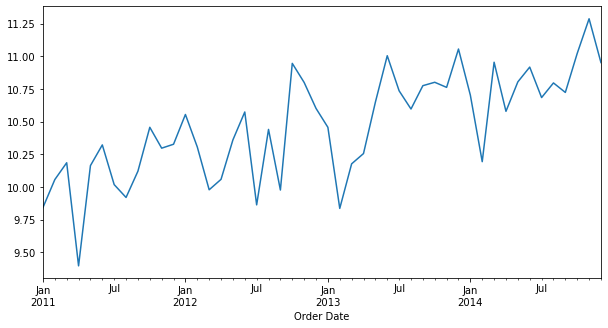

In [111]:
boxcox_data.plot()

### Differencing
Differencing can remove both trend and seasonality in a Time Series

In [112]:
data_boxcox_diff= pd.Series(boxcox_data- boxcox_data.shift(), data.index)

<AxesSubplot:xlabel='Order Date'>

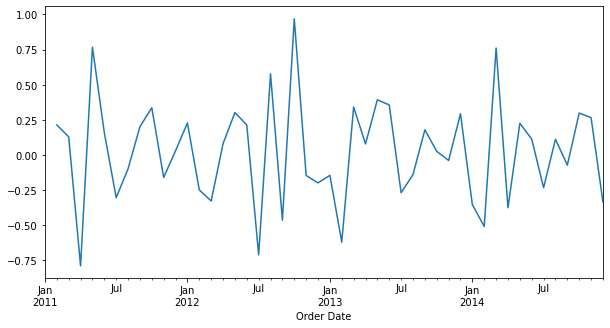

In [113]:
data_boxcox_diff.plot()

In [114]:
data_boxcox_diff.dropna(inplace= True)

<AxesSubplot:xlabel='Order Date'>

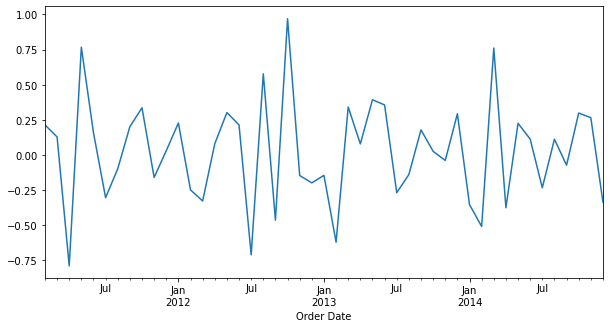

In [115]:
data_boxcox_diff.plot()

In [116]:
adf_test= adfuller(data_boxcox_diff)
adf_test

(-4.535011324054357,
 0.00016989676321143757,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 20.421044121623837)

In [117]:
kpss_test= kpss(data_boxcox_diff)
kpss_test

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.15645577441748137,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

####  Now we can see from the tests that our series is finally stationary

### Autocorrelation

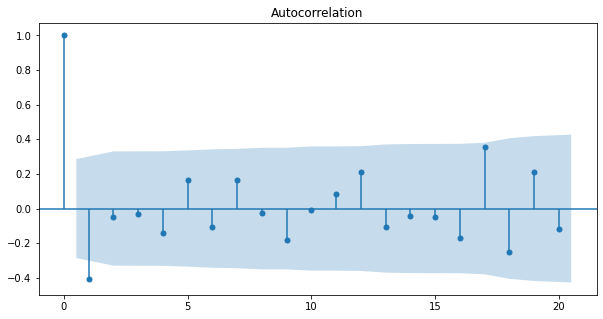

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_diff, lags= 20);

D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


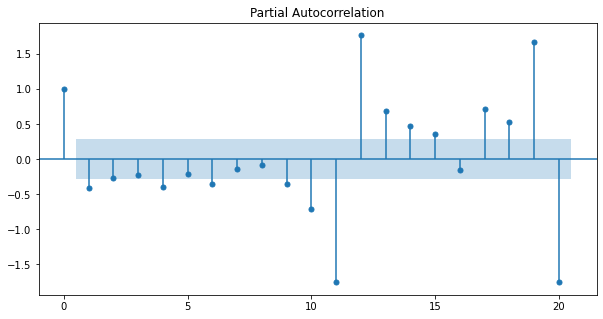

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_diff, lags= 20);

### Auto Regression Model

In [120]:
train_len= 42
train_data_boxcox = boxcox_data[:42]
test_data_boxcox = boxcox_data[42:]
train_data_boxcox_diff = data_boxcox_diff[:42]
test_data_boxcox_diff = data_boxcox_diff[42:]

In [121]:
from statsmodels.tsa.arima_model import ARIMA
ar_model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

const      0.020458
ar.L1.y   -0.410077
dtype: float64


In [122]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(boxcox_data[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


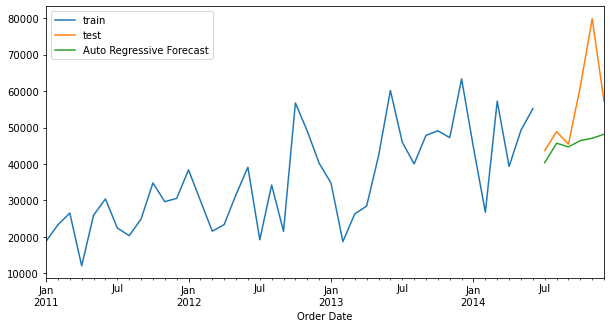

In [154]:
train["Sales"].plot(label= "train")
test["Sales"].plot(label= "test")
y_hat_ar["ar_forecast"][41:].plot(label= "Auto Regressive Forecast")
plt.legend()

#### RMSE and MAPE for AR forecast model

In [124]:
rmse_ar= np.sqrt(mean_squared_error(test["Sales"], y_hat_ar["ar_forecast"][41:]))
rmse_ar

15257.52700040429

In [125]:
mape_ar= np.mean(np.abs(test["Sales"]- y_hat_ar["ar_forecast"][41:])/test["Sales"])*100
mape_ar

16.110825012488714

In [126]:
tempResult= ["Auto Regressive Model Forecast", mape_ar, rmse_ar]
results.loc[8]= tempResult 

In [127]:
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000


### Moving Average Model

In [128]:
ma_model= ARIMA(train_data_boxcox_diff, order= (0,0,1))
ma_model_fit= ma_model.fit()
print(ma_model_fit.params)

const      0.020855
ma.L1.y   -1.000000
dtype: float64


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [129]:
y_hat_ma= data_boxcox_diff.copy()

In [130]:
y_hat_ma["ma_forecast_boxcox_diff"]= ma_model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma["ma_forecast_boxcox"]= y_hat_ma["ma_forecast_boxcox_diff"].cumsum()
y_hat_ma["ma_forecast_boxcox"]= y_hat_ma["ma_forecast_boxcox"].add(boxcox_data[0])
y_hat_ma["ma_forecast"]= np.exp(y_hat_ma["ma_forecast_boxcox"])

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [131]:
y_hat_ma

Order Date
2011-02-01 00:00:00                                                    0.214
2011-03-01 00:00:00                                                 0.128816
2011-04-01 00:00:00                                                -0.789102
2011-05-01 00:00:00                                                 0.767119
2011-06-01 00:00:00                                                 0.158548
2011-07-01 00:00:00                                                -0.303937
2011-08-01 00:00:00                                                 -0.09832
2011-09-01 00:00:00                                                 0.201126
2011-10-01 00:00:00                                                 0.335976
2011-11-01 00:00:00                                                -0.159845
2011-12-01 00:00:00                                                 0.030117
2012-01-01 00:00:00                                                 0.227734
2012-02-01 00:00:00                                              

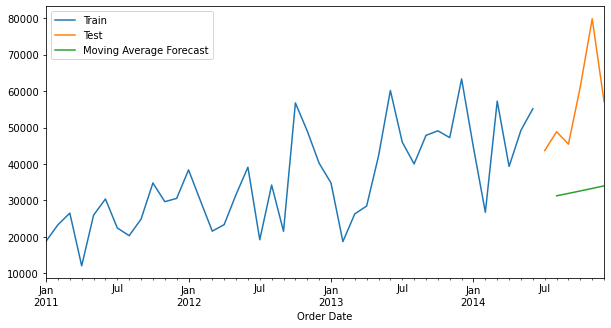

In [132]:
train["Sales"].plot(label= "Train")
test["Sales"].plot(label= "Test")
y_hat_ma["ma_forecast"][train_len:].plot(label= "Moving Average Forecast")
plt.legend()

#### RMSE and MAPE Calculation

In [133]:
rmse_ma= np.sqrt(mean_squared_error(test["Sales"], y_hat_ma["ma_forecast"][41:]))
rmse_ma

26850.196780679722

In [134]:
mape_ma= np.mean(np.abs(test["Sales"]- y_hat_ma["ma_forecast"][41:])/test["Sales"])*100
mape_ma

41.96686082015117

In [135]:
tempResult= ["Moving Average Forecast", mape_ma, rmse_ma]
results.loc[9]= tempResult
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000
9,Moving Average Forecast,41.966861,26850.196781


### Auto Regressive Moving Average(ARMA) 

In [136]:
arma_model= ARIMA(train_data_boxcox_diff, order= (1,0,1))
arma_model_fit= arma_model.fit()
print(arma_model_fit.params)

const      0.020847
ar.L1.y    0.069472
ma.L1.y   -1.000000
dtype: float64


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [137]:
y_hat_arma= data_boxcox_diff.copy()
y_hat_arma["arma_forecast_boxcox_diff"]= arma_model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma["arma_forecast_boxcox"]= y_hat_arma["arma_forecast_boxcox_diff"].cumsum()
y_hat_arma["arma_forecast_boxcox"]= y_hat_arma["arma_forecast_boxcox"].add(boxcox_data[0])
y_hat_arma["arma_forecast"]= np.exp(y_hat_arma["arma_forecast_boxcox"])

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [138]:
y_hat_arma

Order Date
2011-02-01 00:00:00                                                      0.214
2011-03-01 00:00:00                                                   0.128816
2011-04-01 00:00:00                                                  -0.789102
2011-05-01 00:00:00                                                   0.767119
2011-06-01 00:00:00                                                   0.158548
2011-07-01 00:00:00                                                  -0.303937
2011-08-01 00:00:00                                                   -0.09832
2011-09-01 00:00:00                                                   0.201126
2011-10-01 00:00:00                                                   0.335976
2011-11-01 00:00:00                                                  -0.159845
2011-12-01 00:00:00                                                   0.030117
2012-01-01 00:00:00                                                   0.227734
2012-02-01 00:00:00                      

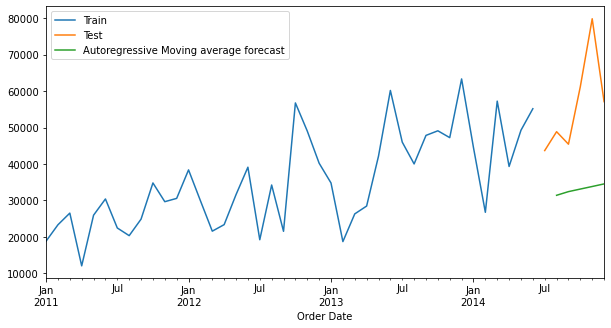

In [139]:
train["Sales"].plot(label= "Train")
test["Sales"].plot(label= "Test")
y_hat_arma["arma_forecast"][42:].plot(label= "Autoregressive Moving average forecast")
plt.legend()

In [140]:
rmse_arma= np.sqrt(mean_squared_error(test["Sales"], y_hat_arma["arma_forecast"][41:]))
rmse_arma

26425.80278968051

In [141]:
mape_arma= np.mean(np.abs(test["Sales"]- y_hat_arma["arma_forecast"][41:])/test["Sales"])*100
mape_arma

41.171433214033854

In [142]:
tempResults= ["Autoregressive Moving Average Forecast", mape_arma, rmse_arma]
results.loc[10]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000
9,Moving Average Forecast,41.966861,26850.196781


###  Auto Regressive Integrated Moving Average

In [143]:
arima_model= ARIMA(train_data_boxcox, order= (1,1,1))
arima_model_fit= arima_model.fit()
print(arima_model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [144]:
y_hat_arima= data_boxcox_diff.copy()
y_hat_arima["arima_forecast_boxcox_diff"]= arima_model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima["arima_forecast_boxcox"]= y_hat_arima["arima_forecast_boxcox_diff"].cumsum()
y_hat_arima["arima_forecast_boxcox"]=  y_hat_arima["arima_forecast_boxcox"].add(boxcox_data[0])
y_hat_arima["arima_forecast"]= np.exp(y_hat_arima["arima_forecast_boxcox"])

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


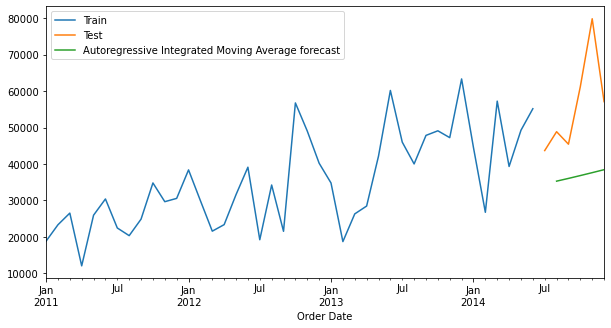

In [145]:
train["Sales"].plot(label= "Train")
test["Sales"].plot(label= "Test")
y_hat_arima["arima_forecast"][42:].plot(label= "Autoregressive Integrated Moving Average forecast")
plt.legend()

In [146]:
rmse_arima= np.sqrt(mean_squared_error(test["Sales"], y_hat_arima["arima_forecast"][41:]))
mape_arima= np.mean(np.abs(test["Sales"]- y_hat_arima["arima_forecast"][41:])/test["Sales"])*100
print(rmse_arima,mape_arima)

22654.32043205391 32.3986504003829


In [147]:
tempResults= ["Automated Regressive Integrated Moving Average Forecast", mape_arima, rmse_arima]
results.loc[11]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000
9,Moving Average Forecast,41.966861,26850.196781


### Seasonal auto regressive integrated moving average(SARIMAX) 

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model= SARIMAX(train_data_boxcox, order= (1,1,1), seasonal_order= (1,1,1,12))
sarima_model_fit= sarima_model.fit()
print(sarima_model_fit.params)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ar.L1      -0.041473
ma.L1      -0.997781
ar.S.L12    0.100953
ma.S.L12   -0.978336
sigma2      0.057858
dtype: float64


In [149]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima["sarima_forecast_boxcox"]= sarima_model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima["sarima_forecast"]= np.exp(y_hat_sarima["sarima_forecast_boxcox"])

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


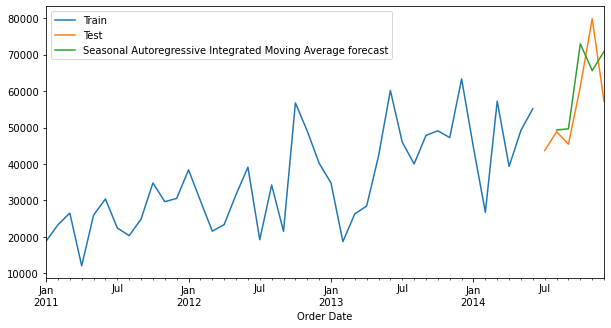

In [150]:
train["Sales"].plot(label= "Train")
test["Sales"].plot(label= "Test")
y_hat_sarima["sarima_forecast"][42:].plot(label= "Seasonal Autoregressive Integrated Moving Average forecast")
plt.legend()

In [151]:
rmse_sarima= np.sqrt(mean_squared_error(test["Sales"], y_hat_sarima["sarima_forecast"][41:]))
mape_sarima= np.mean(np.abs(test["Sales"]- y_hat_sarima["sarima_forecast"][41:])/test["Sales"])*100
print(rmse_sarima,mape_sarima)

9620.54360204805 12.88764244867234


In [152]:
tempResults= ["Seasonal Automated Regressive Integrated Moving Average Forecast", mape_sarima, rmse_sarima]
results.loc[12]= tempResults
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000
9,Moving Average Forecast,41.966861,26850.196781


In [153]:
results

,Method,MAPE,RMSE
0,Naive,17.000000,12355.969134
1,Simple Average Method,34.340000,24146.060000
2,Simple moving average,15.917237,13614.024310
3,Simple Exponential Smoothing Forecast,15.736385,14627.341914
4,Holt's Exponential smoothing Additive,14.930501,12403.842863
5,Holt's Multiplicative Exponential,14.511280,11789.645621
6,Holt Winter's additive forecast,10.174766,9306.821065
7,Holt Winter's Multiplicative forecast,11.433907,9423.231719
8,Auto Regressive Model Forecast,16.110825,15257.527000
9,Moving Average Forecast,41.966861,26850.196781


## Conclusion
 So in conclusion from using the various diffferent types of time series models for the same problem we can clearly see that the HOLT WINTERS ADDITIVE MODEL works the best for our giveen problem as it is an additive time series and also has trend as well as seasonality which is well captured in the model we can connclude that by looking at the graph as well as the RMSE and MAPE values that we have SARIMA model was the second best model